<a href="https://colab.research.google.com/github/augustolimald/cpa/blob/main/NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Augusto César Rodrigues Lima

**Matricula**: 201910386

**Turma**: 14A

**Link do repositório GitHub:** https://github.com/augustolimald/cpa

# Funções Auxiliares



## Aumentar Recursão

O Google Collab estava dando erro para chamadas em arrays acima de 1000 elementos. A linha abaixo aumenta o threshold para que isso não aconteça

In [88]:
import sys
sys.setrecursionlimit(1500)


## Importações e Variáveis globais

In [89]:
import numpy as np
import math

global_1=0

## Gerar Números Aleatório

In [90]:
import random

def generateNumber():
  return random.randint(1, 1000)


def generateArray(size):
  array = []

  for i in range(size):
    array.append(generateNumber())

  return array

## Tempo de Execução

In [91]:
import time

def currentTime():
  return round(time.time() * 1000)

def calculateExecutionTime(parameters, algorithm):
  startTime = currentTime()
  algorithm(parameters)
  endTime = currentTime()
  return endTime - startTime

## Gerar Gráficos

In [92]:
import matplotlib.pyplot as plt

def generateGraph(title, xlabel, ylabel, dataset):
  for data in dataset:
    plt.plot(np.array(data['xarray']), np.array(data['yarray']), label=data['label'], color=data['color'])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

# Problema NP




## Problema Subsequência crescente máxima

In [93]:
def algorithm(array):
  N = len(array)
  P = [None for i in range(N)]
  M = [None for i in range(N + 1)]

  L = 0
  for i in range(0, N):
    lower = 1
    higher = L
    while lower <= higher:
      middle = math.ceil((lower + higher) / 2)
      if array[M[middle]] < array[i]:
        lower = middle + 1
      else:
        higher = middle - 1

    newL = lower

    P[i] = M[newL-1]
    M[newL] = i

    if newL > L:
      L = newL

  S = [None for i in range(L)]
  k = M[L]
  for i in range(L-1, -1, -1):
    S[i] = array[k]
    k = P[k]

  return S

input = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
expectedOutput = [0, 2, 6, 9, 11, 15]
testResult = algorithm(input)


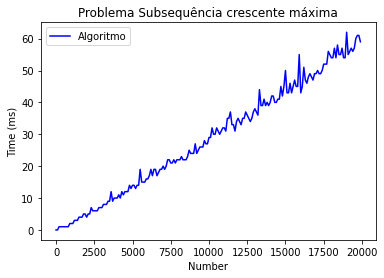

In [94]:
xarray = []
yarray = []

for number in range(1, 20000, 100):
  xarray.append(number)

  input = generateArray(number)

  yarray.append(calculateExecutionTime(input, algorithm))

generateGraph('Problema Subsequência crescente máxima', 'Number', 'Time (ms)', [
  {
    'label': 'Algoritmo',
    'color': 'blue',
    'xarray': xarray,
    'yarray': yarray
  }
])